# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [258]:
%pip install --upgrade plotly

## Import Statements

In [259]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [260]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [261]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [262]:
# Shapes of dataframes
print(df_hh_income.shape)
print(df_pct_poverty.shape)
print(df_pct_completed_hs.shape)
print(df_share_race_city.shape)
print(df_fatalities.shape)

# Names of dataframes' columns
print(df_hh_income.columns)
print(df_pct_poverty.columns)
print(df_pct_completed_hs.columns)
print(df_share_race_city.columns)
print(df_fatalities.columns)

(29322, 3)
(29329, 3)
(29329, 3)
(29268, 7)
(2535, 14)
Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')
Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')
Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')
Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')


In [263]:
# Has duplicate
print(df_hh_income.duplicated)
print(df_pct_poverty.duplicated)
print(df_pct_completed_hs.duplicated)
print(df_share_race_city.duplicated)
print(df_fatalities.duplicated)

<bound method DataFrame.duplicated of       Geographic Area                    City Median Income
0                  AL              Abanda CDP         11207
1                  AL          Abbeville city         25615
2                  AL         Adamsville city         42575
3                  AL            Addison town         37083
4                  AL              Akron town         21667
...               ...                     ...           ...
29317              WY  Woods Landing-Jelm CDP           NaN
29318              WY            Worland city         41523
29319              WY             Wright town         77114
29320              WY              Yoder town         37500
29321              WY           Y-O Ranch CDP           NaN

[29322 rows x 3 columns]>
<bound method DataFrame.duplicated of       Geographic Area                    City poverty_rate
0                  AL              Abanda CDP         78.8
1                  AL          Abbeville city         29.1


In [264]:
# Has NaN
print(df_hh_income.isna())
print(df_pct_poverty.isna())
print(df_pct_completed_hs.isna())
print(df_share_race_city.isna())
print(df_fatalities.isna())

       Geographic Area   City  Median Income
0                False  False          False
1                False  False          False
2                False  False          False
3                False  False          False
4                False  False          False
...                ...    ...            ...
29317            False  False           True
29318            False  False          False
29319            False  False          False
29320            False  False          False
29321            False  False           True

[29322 rows x 3 columns]
       Geographic Area   City  poverty_rate
0                False  False         False
1                False  False         False
2                False  False         False
3                False  False         False
4                False  False         False
...                ...    ...           ...
29324            False  False         False
29325            False  False         False
29326            False  False         

## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [265]:
# Drop null values
df_hh_income = df_hh_income.dropna()
df_pct_poverty = df_pct_poverty.dropna()
df_pct_completed_hs = df_pct_completed_hs.dropna()
df_share_race_city = df_share_race_city.dropna()
df_fatalities = df_fatalities.dropna()

In [ ]:
# Has null
df_hh_income.isna()
df_pct_poverty.isna()
df_pct_completed_hs.isna()
df_share_race_city.isna()
df_fatalities.isna()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2519,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2523,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2525,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2533,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [275]:
has_poverty = {'Geographic Area': [], 'City': [], 'poverty_rate': []}

for ind in df_pct_poverty.index:
  # If valid poverty rate exists
  if df_pct_poverty['poverty_rate'][ind] != '-':
    has_poverty['Geographic Area'].append(df_pct_poverty['Geographic Area'][ind])
    has_poverty['City'].append(df_pct_poverty['City'][ind])
    has_poverty['poverty_rate'].append(df_pct_poverty['poverty_rate'][ind])

# Make dataframe and sort values in descending order
df_has_poverty = pd.DataFrame(has_poverty)
df_has_poverty.sort_values('poverty_rate', ascending=False)

,Geographic Area,City,poverty_rate
4416,FL,Homestead Base CDP,98.6
23592,SD,Allen CDP,94.1
27555,WA,Outlook CDP,93.8
20315,OK,Badger Lee CDP,93.8
26334,UT,Randlett CDP,93.5
...,...,...,...
1212,AZ,Rock House CDP,0
19591,OH,Kings Mills CDP,0
7242,IL,Valley City village,0
19729,OH,Miamiville CDP,0


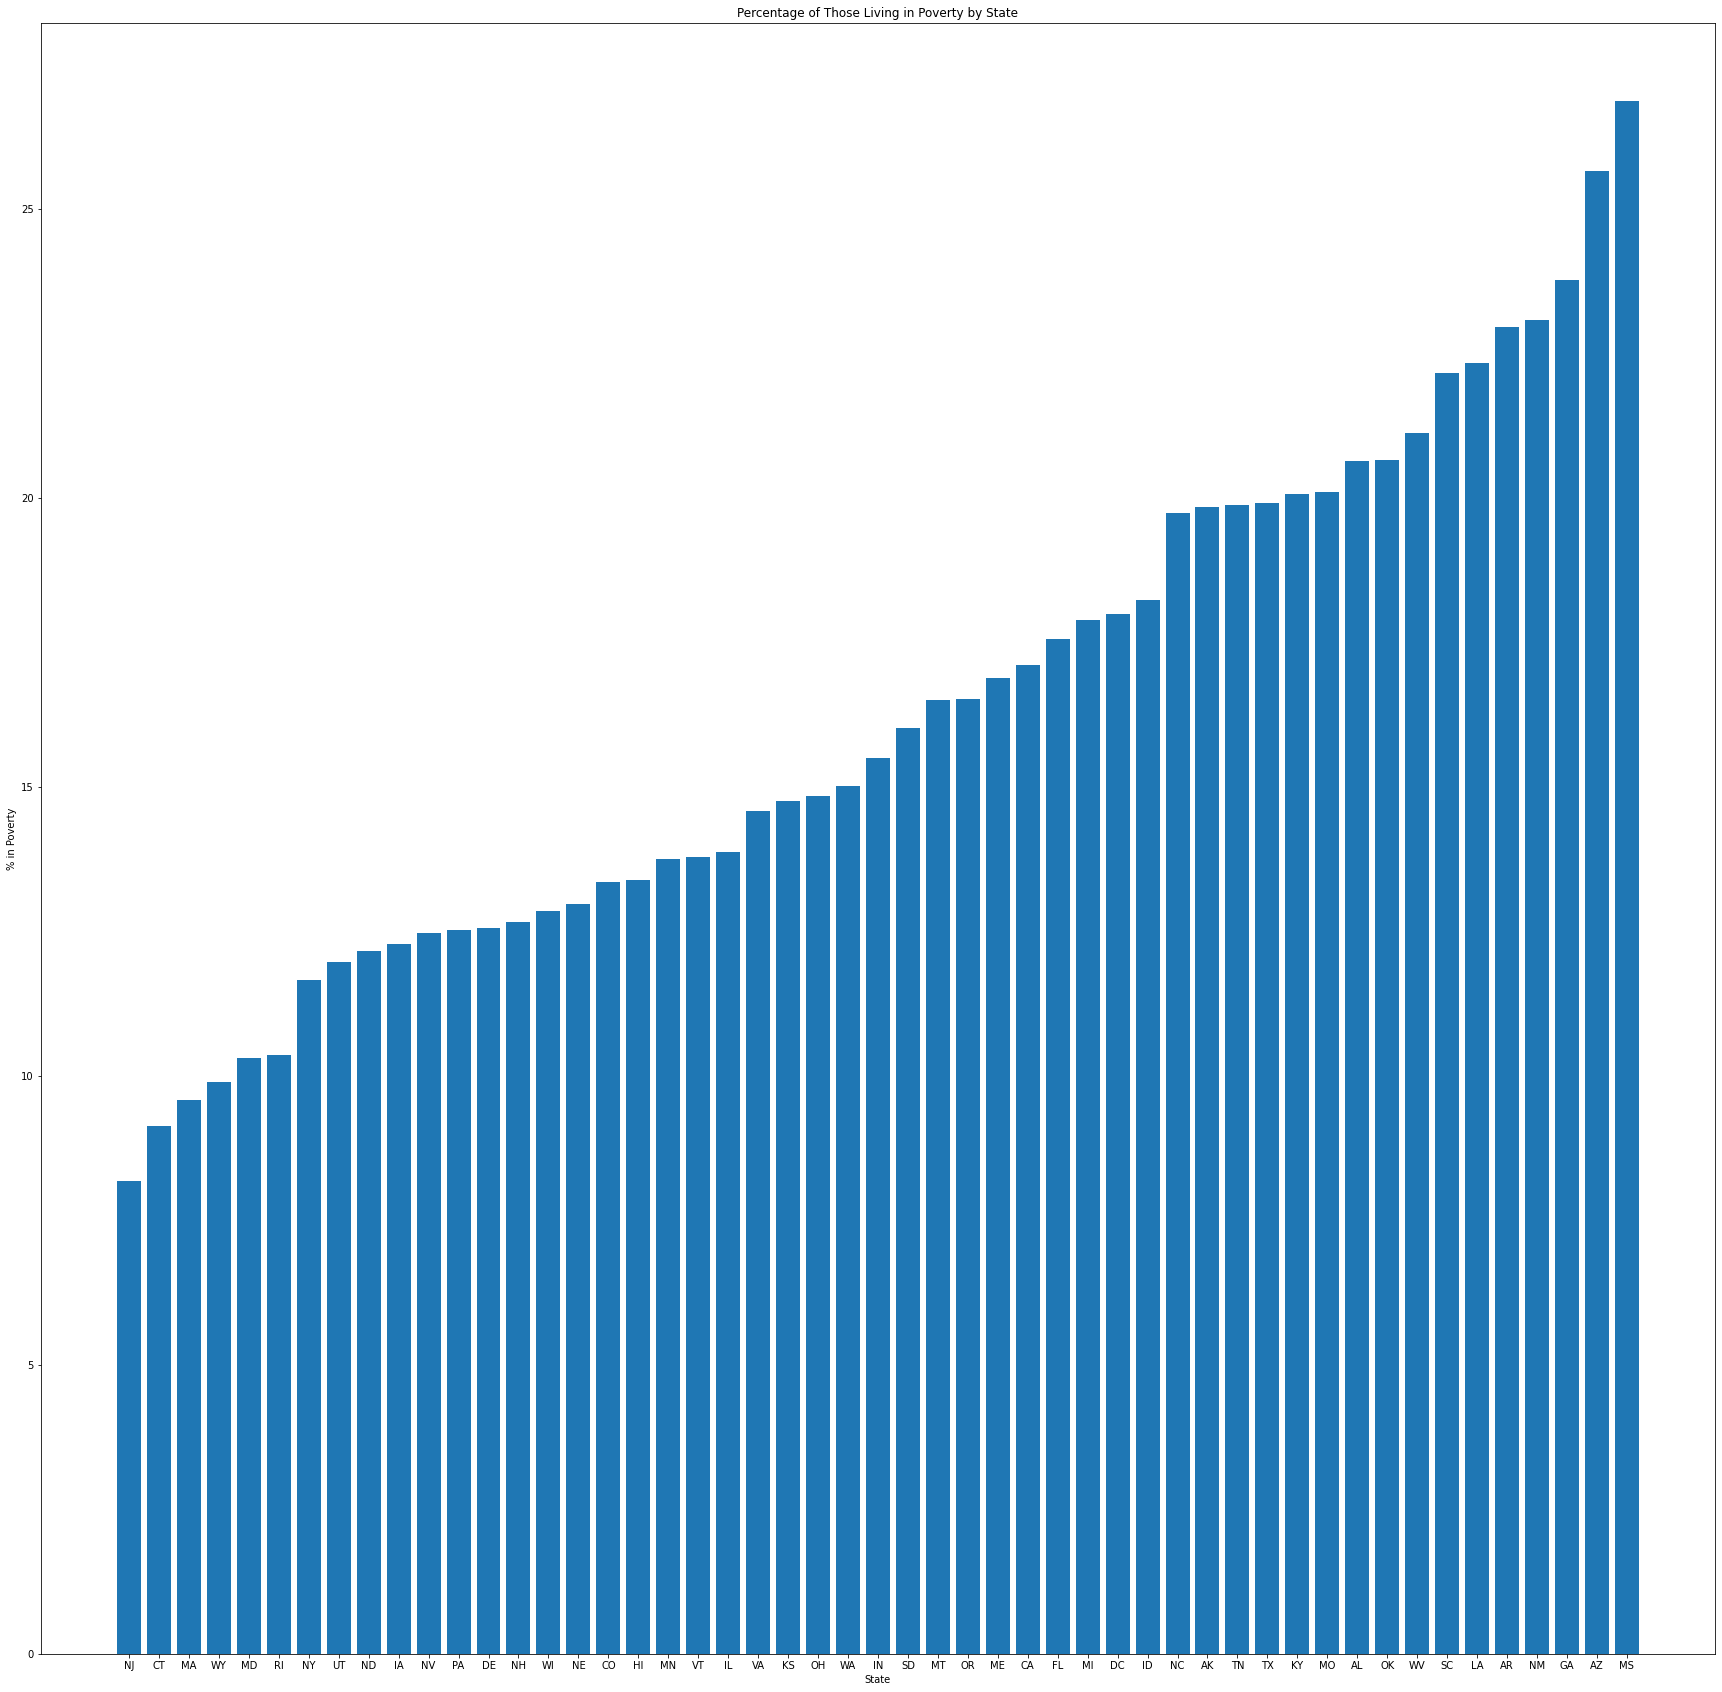

In [276]:
import operator
state_counts = df_has_poverty.value_counts('Geographic Area')
state_poverty_rates = {}
state_poverty_sorted = {}

# Fill spaces for dictionary
for s in state_counts.index:
  state_poverty_rates[s] = 0
  state_poverty_sorted[s]= 0

for ind in df_has_poverty.index:
  # Add poverty_rate value to poverty rate of state
  state = df_has_poverty['Geographic Area'][ind]
  poverty_rate = float(df_has_poverty['poverty_rate'][ind])
  state_poverty_rates[state] += poverty_rate

# Convert total poverty rates to a mean
for s in state_counts.index:
  state_poverty_rates[s] = state_poverty_rates[s] / state_counts[s]

# Make rates in reverse order
state_poverty_temp = sorted(state_poverty_rates.items(), key=operator.itemgetter(1))
state_poverty_sorted = {}

# Put sorted values into dict
for i in range(0, len(state_poverty_temp)):
  state_name = state_poverty_temp[i][0]

  # Convert numbers to float and numeric
  poverty_rate = pd.options.display.float_format(state_poverty_temp[i][1])
  state_poverty_sorted[state_name] = pd.to_numeric(poverty_rate)

# Keys are x ticks, and values are y values
x = list(state_poverty_sorted.keys())
y = list(state_poverty_sorted.values())

# Plot and show
plt.figure(figsize=(30, 30))
plt.bar(range(len(state_poverty_sorted)), y, tick_label=x)

# Graph and axes titles
plt.title('Percentage of Those Living in Poverty by State')
plt.xlabel('State')
plt.ylabel('% in Poverty')
plt.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [277]:
graduated = {'Geographic Area': [], 'City': [], 'percent_completed_hs': []}

for ind in df_pct_completed_hs.index:
  # If valid graduation rate exists
  if df_pct_completed_hs['percent_completed_hs'][ind] != '-':
    graduated['Geographic Area'].append(df_pct_completed_hs['Geographic Area'][ind])
    graduated['City'].append(df_pct_completed_hs['City'][ind])
    graduated['percent_completed_hs'].append(df_pct_completed_hs['percent_completed_hs'][ind])

# Make dataframe and sort values in descending order
df_graduated = pd.DataFrame(graduated)
df_graduated.sort_values('percent_completed_hs', ascending=False)

import operator
state_counts_gr = df_graduated.value_counts('Geographic Area')
state_graduation = {}
state_graduation_sorted = {}

# Fill spaces for dictionary
for s in state_counts_gr.index:
  state_graduation[s] = 0
  state_graduation_sorted[s]= 0

for ind in df_graduated.index:
  # Add graduation value to graduation rate of state
  state = df_graduated['Geographic Area'][ind]
  graduation_rate = float(df_graduated['percent_completed_hs'][ind])
  state_graduation[state] += graduation_rate

# Convert total gradiation rates to a mean
for s in state_counts.index:
  mean = state_graduation[s] / state_counts[s]
  state_graduation[s] = pd.options.display.float_format(mean)

# Make rates in reverse order
state_graduation_temp = sorted(state_graduation.items(), key=operator.itemgetter(1))
state_graduation_sorted = {}

# Put sorted values into dict
for i in range(0, len(state_graduation_temp)):
  state_name = state_poverty_temp[i][0]
  graduation_rate = state_graduation_temp[i][1]
  state_graduation_sorted[state_name] = graduation_rate

length = len(state_graduation_sorted.keys())
first = list(state_graduation_sorted.keys())[0]
last = list(state_graduation_sorted.keys())[length - 1]
print(f"State with lowest HS graduation rate: {first}")
print(f"State with highest HS graduation rate: {last}")
print(state_graduation_sorted)

State with lowest HS graduation rate: NJ
State with highest HS graduation rate: MS
{'NJ': '75.69', 'CT': '78.47', 'MA': '79.01', 'WY': '79.29', 'MD': '79.95', 'RI': '80.30', 'NY': '80.47', 'UT': '80.85', 'ND': '80.98', 'IA': '81.63', 'NV': '81.96', 'PA': '82.22', 'DE': '82.35', 'NH': '82.91', 'WI': '83.25', 'NE': '83.52', 'CO': '84.88', 'HI': '85.13', 'MN': '85.17', 'VT': '85.74', 'IL': '86.32', 'VA': '87.72', 'KS': '87.75', 'OH': '87.82', 'WA': '88.07', 'IN': '88.20', 'SD': '88.23', 'MT': '88.34', 'OR': '88.42', 'ME': '88.48', 'CA': '88.52', 'FL': '88.83', 'MI': '89.18', 'DC': '89.21', 'ID': '89.30', 'NC': '89.47', 'AK': '89.98', 'TN': '89.99', 'TX': '90.11', 'KY': '90.11', 'MO': '90.26', 'AL': '90.49', 'OK': '90.71', 'WV': '90.77', 'SC': '90.85', 'LA': '91.43', 'AR': '91.59', 'NM': '91.61', 'GA': '91.62', 'AZ': '91.67', 'MS': '92.40'}


# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [278]:
poverty_and_graduation = {'Geographic Area': [], 'poverty_rate': [], 'percent_completed_hs': []}
for key in state_poverty_sorted:
  # Get the state and poverty rate from dictionary of state corresponding to poverty rate
  poverty_and_graduation['Geographic Area'].append(key)
  poverty = state_poverty_sorted[key]
  poverty_and_graduation['poverty_rate'].append(poverty)

for state in poverty_and_graduation['Geographic Area']:
  # Get % of HS graduates from dictionary of state corresponding to graduation rate
  completed_hs = state_graduation_sorted[state]
  poverty_and_graduation['percent_completed_hs'].append(completed_hs)

# Convert numbers to numeric
poverty_and_graduation['percent_completed_hs'] = pd.to_numeric(poverty_and_graduation['percent_completed_hs'])
poverty_and_graduation['poverty_rate'] = pd.to_numeric(poverty_and_graduation['poverty_rate'])

[75.69 78.47 79.01 79.29 79.95 80.3  80.47 80.85 80.98 81.63 81.96 82.22
 82.35 82.91 83.25 83.52 84.88 85.13 85.17 85.74 86.32 87.72 87.75 87.82
 88.07 88.2  88.23 88.34 88.42 88.48 88.52 88.83 89.18 89.21 89.3  89.47
 89.98 89.99 90.11 90.11 90.26 90.49 90.71 90.77 90.85 91.43 91.59 91.61
 91.62 91.67 92.4 ]


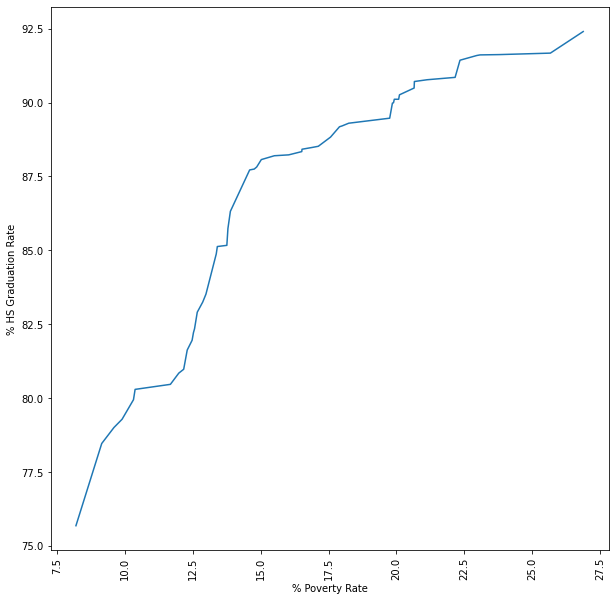

In [279]:
# Poverty rate column values and graduation rate column values
poverty_rate = poverty_and_graduation['poverty_rate']
graduation_rate = poverty_and_graduation['percent_completed_hs']

# Set figure size and axes labels
plt.figure(figsize=(10, 10))
plt.xlabel("% Poverty Rate")
plt.ylabel("% HS Graduation Rate")

# Rotate x ticks and plot
plt.xticks(rotation='vertical')
plt.yticks(rotation='horizontal')
plt.plot(poverty_rate, graduation_rate)
print(poverty_and_graduation['percent_completed_hs'])

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

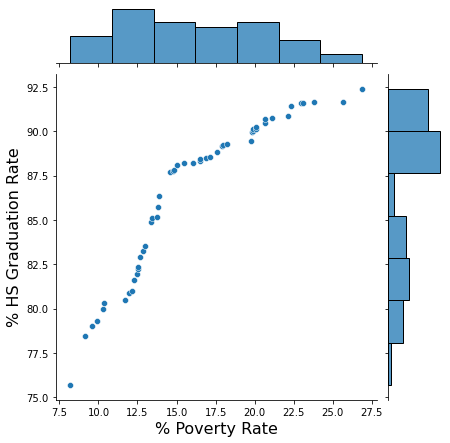

In [280]:
# Plot a jointplot and set axes labels
ax = sns.jointplot(x=poverty_rate, y=graduation_rate)
ax.set_axis_labels('% Poverty Rate', '% HS Graduation Rate', fontsize=16)

[Text(0, 0.5, '% HS Graduation Rate'), Text(0.5, 0, '% Poverty Rate')]

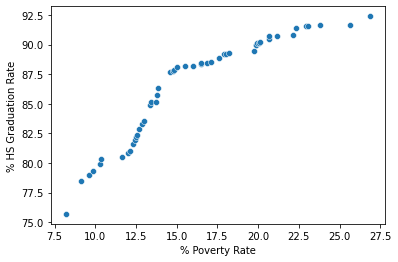

In [281]:
# Plot a scatterplot and set axes labels
ax = sns.scatterplot(x=poverty_rate, y=graduation_rate)
ax.set(xlabel='% Poverty Rate', ylabel='% HS Graduation Rate')

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

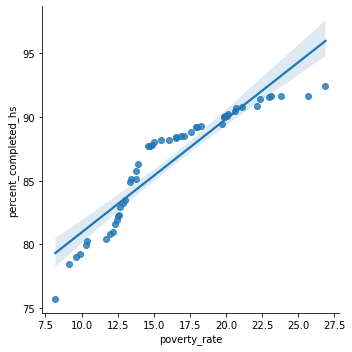

In [282]:
# Convert dictionary into dataframe and analyze line of best fit
data_poverty_graduation = pd.DataFrame(poverty_and_graduation)
ax = sns.lmplot(x='poverty_rate', y='percent_completed_hs', data=data_poverty_graduation)

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [283]:
makeup_white = {}
makeup_black = {}
makeup_native_american = {}
makeup_asian = {}
makeup_hispanic = {}
makeup_other = {}

count_white = {}
count_black = {}
count_native_american = {}
count_asian = {}
count_hispanic = {}
count_other = {}

# Fill up values with 0
count = 0
for ind in df_share_race_city.index:
  # Set makeups to 0
  state = df_share_race_city['Geographic area'][ind]
  makeup_white[state] = 0
  makeup_black[state] = 0
  makeup_native_american[state] = 0
  makeup_asian[state] = 0
  makeup_hispanic[state] = 0

  # Set counts to 0
  count_white[state] = 0
  count_black[state] = 0
  count_native_american[state] = 0
  count_asian[state] = 0
  count_hispanic[state] = 0

for ind in df_share_race_city.index:
  if df_share_race_city['share_white'][ind] != '(X)':
    # State and racial makeups
    state = df_share_race_city['Geographic area'][ind]
    white = float(df_share_race_city['share_white'][ind])
    black = float(df_share_race_city['share_black'][ind])
    native_american = float(df_share_race_city['share_native_american'][ind])
    asian = float(df_share_race_city['share_asian'][ind])
    hispanic = float(df_share_race_city['share_hispanic'][ind])

    # Increment makeup total
    makeup_white[state] = makeup_white[state] + white
    makeup_black[state] = makeup_black[state] + black
    makeup_native_american[state] = makeup_native_american[state] + native_american
    makeup_asian[state] = makeup_asian[state] + asian
    makeup_hispanic[state] = makeup_hispanic[state] + hispanic
    
    # Increment count total
    count_white[state] = count_white[state] + 1
    count_black[state] = count_black[state] + 1
    count_native_american[state] = count_native_american[state] + 1
    count_asian[state] = count_asian[state] + 1
    count_hispanic[state] = count_hispanic[state] + 1

In [284]:
avg_race = {'State': [], 'Race': [], 'Makeup': []}
for state in makeup_white:
  # Find averages of racial makeup
  white = makeup_white[state] / count_white[state]
  black = makeup_black[state] / count_black[state]
  native_american = makeup_native_american[state] / count_native_american[state]
  asian = makeup_asian[state] / count_asian[state]
  hispanic = makeup_hispanic[state] / count_hispanic[state]

  # Append state
  for i in range(0, 5):
    avg_race['State'].append(state)

  # Append races
  avg_race['Race'].append('White')
  avg_race['Race'].append('Black')
  avg_race['Race'].append('Native American')
  avg_race['Race'].append('Asian')
  avg_race['Race'].append('Hispanic')

  # Append racial makeup
  avg_race['Makeup'].append(white)
  avg_race['Makeup'].append(black)
  avg_race['Makeup'].append(native_american)
  avg_race['Makeup'].append(asian)
  avg_race['Makeup'].append(hispanic)

# Convert to dataframe
avg_race_df = pd.DataFrame(avg_race)


# Make bar plot out of dataset
avg_race_bar = px.bar(x=avg_race_df['State'], y=avg_race_df['Makeup'], 
                      color=avg_race_df['Race'], title='Racial Makeup of Each US State')

# Update layout and show
avg_race_bar.update_layout(xaxis_title='State', 
                          yaxis_title='% of populaton')
avg_race_bar.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [285]:
df_fatalities_temp = df_fatalities
for ind in df_fatalities_temp.index:
  race = df_fatalities_temp['race'][ind]

  # Rename race based on abbreviation
  if race == 'W':
    df_fatalities_temp['race'][ind] = 'White'
  elif race == 'B':
    df_fatalities_temp['race'][ind] = 'Black'
  elif race == 'H':
    df_fatalities_temp['race'][ind] = 'Hispanic'
  elif race == 'A':
    df_fatalities_temp['race'][ind] = 'Asian'
  elif race == 'N':
    df_fatalities_temp['race'][ind] = 'Native American'
  elif race == 'O':
    df_fatalities_temp['race'][ind] = 'Other'

df_fatal_temp_vals = df_fatalities_temp.value_counts('race')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning:


A value is trying

In [286]:
# Make donut chart by setting 'hole' size
fig = px.pie(labels=df_fatal_temp_vals.index, values=df_fatal_temp_vals.values, 
             title="Racial Distribution of People Killed", names=df_fatal_temp_vals.index, hole=0.6)

# Make text inside and only percent is inside it
fig.update_traces(textposition='inside', textinfo='percent')
fig.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [287]:
df_fatalities_temp2 = df_fatalities
for ind in df_fatalities_temp2.index:
  gender = df_fatalities_temp2['gender'][ind]

  # Rename gender based on abbreviation
  if gender == 'M':
    df_fatalities_temp2['gender'][ind] = 'Male'
  elif gender == 'F':
    df_fatalities_temp2['gender'][ind] = 'Female'

df_fatal_temp2_vals = df_fatalities_temp2.value_counts('gender')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Make donut chart by setting 'hole' size
fig2 = px.pie(labels=df_fatal_temp2_vals.index, values=df_fatal_temp2_vals.values, 
             title="Gender Distribution of People Killed", names=df_fatal_temp2_vals.index, hole=0.6)

# Make text inside and only percent is inside it
fig2.update_traces(textposition='inside', textinfo='percent')
fig2.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [288]:
# Male data
df_fatalities_male = df_fatalities[df_fatalities['gender'] == 'Male']
df_fatalities_male.head()

# Female data
df_fatalities_female = df_fatalities[df_fatalities['gender'] == 'Female']
df_fatalities_female.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
8,16,Autumn Steele,06/01/15,shot,unarmed,34.00,Female,White,Burlington,IA,False,other,Not fleeing,True
51,100,Kristiana Coignard,22/01/15,shot and Tasered,knife,17.00,Female,White,Longview,TX,True,other,Not fleeing,False
60,20,Jessie Hernandez,26/01/15,shot,vehicle,17.00,Female,Hispanic,Denver,CO,False,other,Not fleeing,False
67,111,Tiffany Terry,27/01/15,shot,knife,39.00,Female,White,Omaha,NE,True,attack,Not fleeing,False
80,118,Yuvette Henderson,03/02/15,shot,gun,38.00,Female,Black,Emeryville,CA,False,attack,Car,False


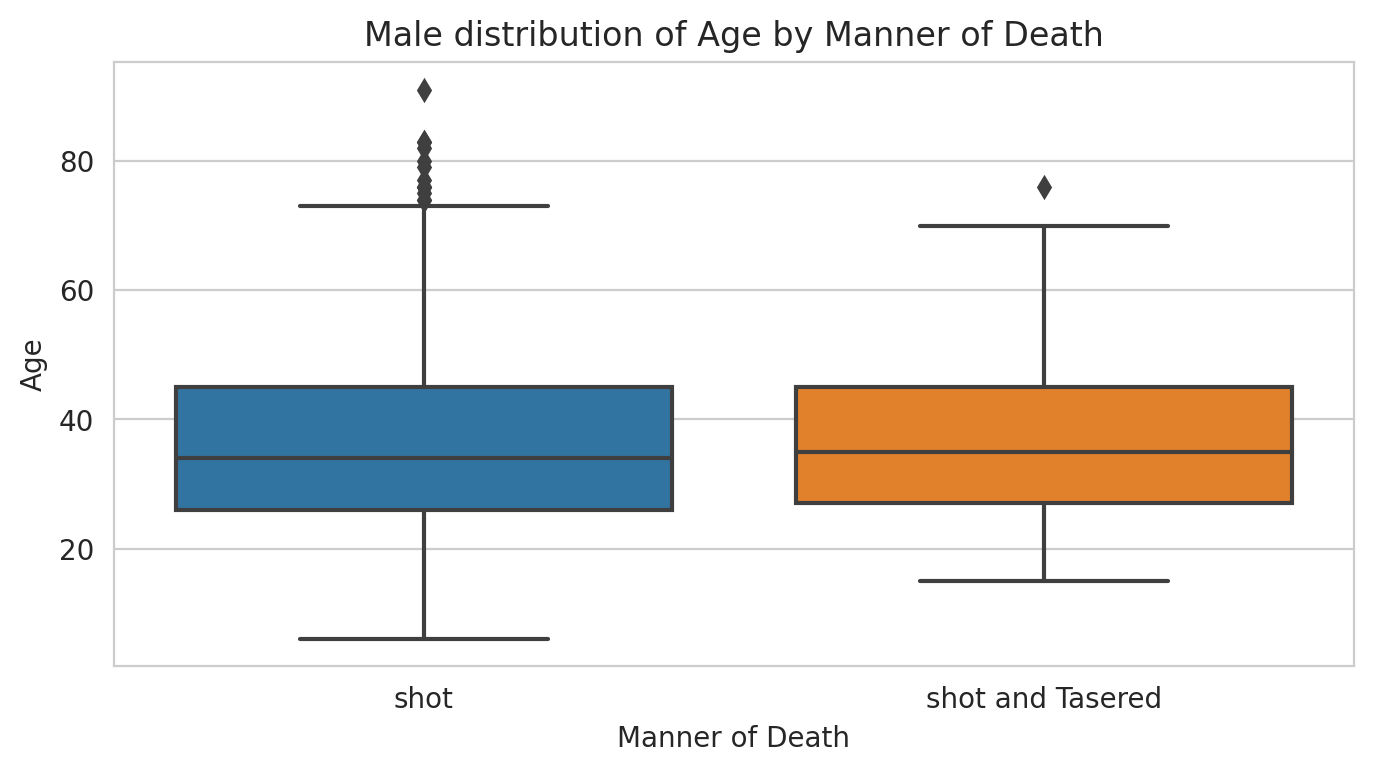

In [289]:
# Set figure size and plot count
plt.figure(figsize=(8, 4), dpi=200)

# With a style for whitegrid, set 'df_fatalities_male' 'manner of death' vs 'age'
with sns.axes_style("whitegrid"):
  sns.boxplot(data=df_fatalities_male,
              x='manner_of_death', y='age')

# Set axis label and title
plt.xlabel('Manner of Death')
plt.ylabel('Age')
plt.title('Male distribution of Age by Manner of Death')
plt.show()

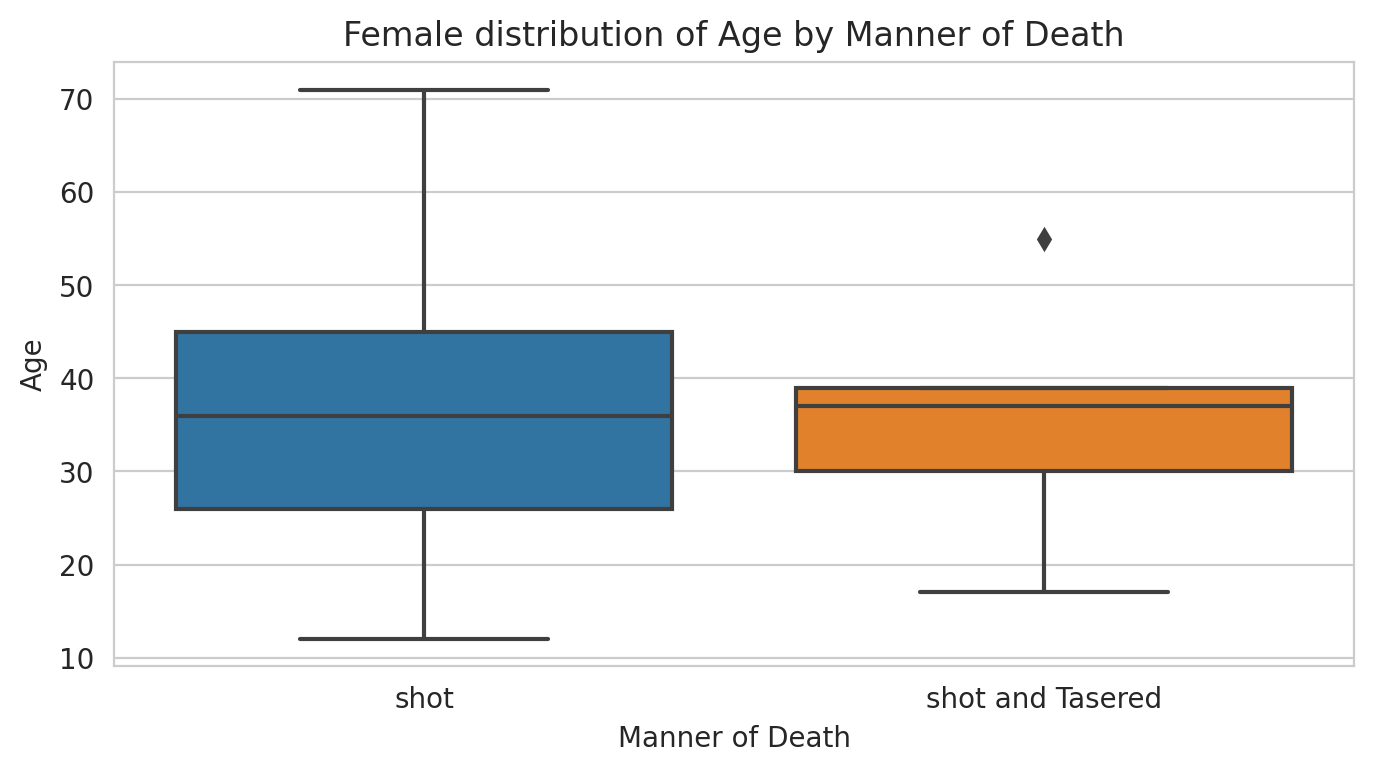

In [290]:
# Set figure size and plot count
plt.figure(figsize=(8, 4), dpi=200)

# With a style for whitegrid, set 'df_fatalities_female' 'manner of death' vs 'age'
with sns.axes_style("whitegrid"):
  sns.boxplot(data=df_fatalities_female,
              x='manner_of_death', y='age')

# Set axis label and title
plt.xlabel('Manner of Death')
plt.ylabel('Age')
plt.title('Female distribution of Age by Manner of Death')
plt.show()

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [291]:
df_fatalities_armed = df_fatalities[(df_fatalities['armed'] == 'gun') | (df_fatalities['armed'] == 'unarmed')]

In [292]:
df_fatal_deaths = df_fatalities_armed.value_counts('armed')
df_fatal_deaths.head()

armed
gun        1247
unarmed     165
dtype: int64

In [293]:
# Make donut chart by setting 'hole' size
fig3 = px.pie(labels=df_fatal_deaths.index, values=df_fatal_deaths.values, 
             title="Distribution of Killings by Gun vs Unarmed", names=df_fatal_deaths.index, hole=0.6)

# Make text inside and only percent is inside it
fig3.update_traces(textposition='inside', textinfo='percent')
fig3.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [294]:
df_fatal_age_range = df_fatalities
age_ind = []

for ind in df_fatal_age_range.index:
  age = df_fatal_age_range['age'][ind]

  # Determine age range 
  if age < 25.00:
    age_ind.append('Under 25')
  else:
    age_ind.append('25 and Older')

# Age range column and group by values of age range
df_fatal_age_range['age range'] = age_ind
df_fatal_age = df_fatal_age_range.value_counts('age range')

# Make donut chart by setting 'hole' size
fig4 = px.pie(labels=df_fatal_age.index, values=df_fatal_age.values, 
             title="Distribution of Age Ranges of Those Killed", names=df_fatal_age.index, hole=0.6)

# Make text inside and only percent is inside it
fig4.update_traces(textposition='inside', textinfo='percent')
fig4.show()

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



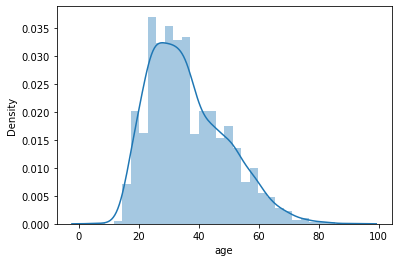

In [295]:
# KDE plot and histogram of age distribution
sns.distplot(a=df_fatalities.age)
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



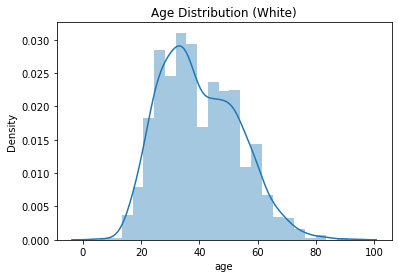

In [296]:
# dataframes for white
df_fatalities_white = df_fatalities[df_fatalities['race'] == 'White']

# KDE plot and histogram of age distribution for white
sns.distplot(a=df_fatalities_white.age).set(title='Age Distribution (White)')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



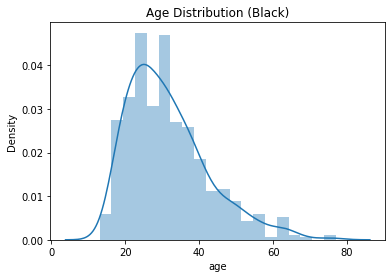

In [297]:
# dataframes for black
df_fatalities_black = df_fatalities[df_fatalities['race'] == 'Black']

# KDE plot and histogram of age distribution for black
sns.distplot(a=df_fatalities_black.age).set(title='Age Distribution (Black)')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



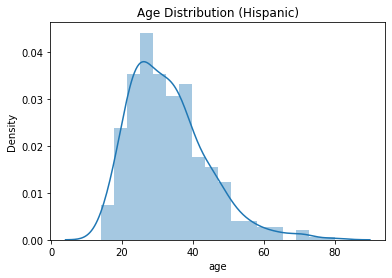

In [298]:
# dataframes for hispanic
df_fatalities_hispanic = df_fatalities[df_fatalities['race'] == 'Hispanic']

# KDE plot and histogram of age distribution for hispanic
sns.distplot(a=df_fatalities_hispanic.age).set(title='Age Distribution (Hispanic)')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



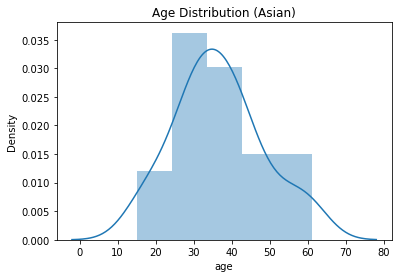

In [299]:
# dataframes for asian
df_fatalities_asian = df_fatalities[df_fatalities['race'] == 'Asian']

# KDE plot and histogram of age distribution for asian
sns.distplot(a=df_fatalities_asian.age).set(title='Age Distribution (Asian)')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



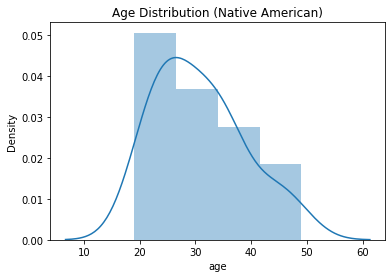

In [300]:
# dataframes for native_american
df_fatalities_native_american= df_fatalities[df_fatalities['race'] == 'Native American']

# KDE plot and histogram of age distribution for white
sns.distplot(a=df_fatalities_native_american.age).set(title='Age Distribution (Native American)')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



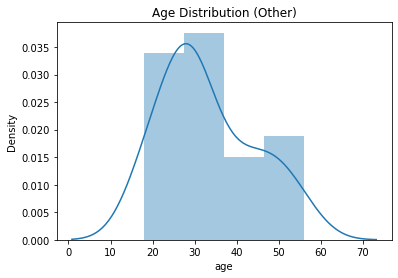

In [301]:
# dataframes for other
df_fatalities_other = df_fatalities[df_fatalities['race'] == 'Other']

# KDE plot and histogram of age distribution for other
sns.distplot(a=df_fatalities_other.age).set(title='Age Distribution (Other)')
plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [302]:
# Count of killed by race
df_killed_by_race = df_fatalities.value_counts('race')
print(df_killed_by_race)

race
White              1168
Black               592
Hispanic            401
Asian                36
Native American      29
Other                28
dtype: int64


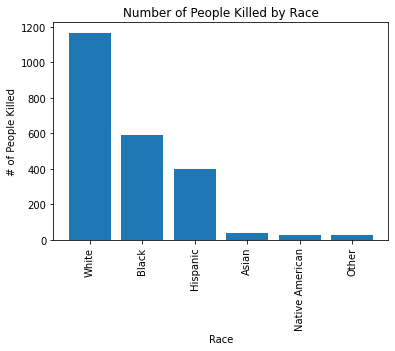

In [303]:
# Plot number of people killed by race
plt.bar(range(len(df_killed_by_race)), df_killed_by_race.values, tick_label=df_killed_by_race.index)
plt.xticks(rotation='vertical')

# Title and axes
plt.title('Number of People Killed by Race')
plt.xlabel('Race')
plt.ylabel('# of People Killed')
plt.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [304]:
# Count of mentally ill
df_mentally_ill = df_fatalities.value_counts('signs_of_mental_illness')
print(df_mentally_ill)

signs_of_mental_illness
False    1681
True      573
dtype: int64


In [305]:
# Make donut chart by setting 'hole' size
fig5 = px.pie(labels=df_mentally_ill.index, values=df_mentally_ill.values, 
             title="Do Those Killed Have a Metall Illness?", names=df_mentally_ill.index, hole=0.6)

# Make text inside and only percent is inside it
fig5.update_traces(textposition='inside', textinfo='percent')
fig5.show()

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [306]:
# sort values by counts of state, city
sorted_cities = df_fatalities.value_counts(['state', 'city'], sort=True)
city_killed = {}

for ind in sorted_cities.index:
  # Get city, state, and number of deaths
  city = ind[1]
  state = ind[0]
  deaths = sorted_cities[ind]

  # Put in number of deaths as an index of city, state
  location = f'{city}, {state}'
  city_killed[location] = deaths

<BarContainer object of 10 artists>

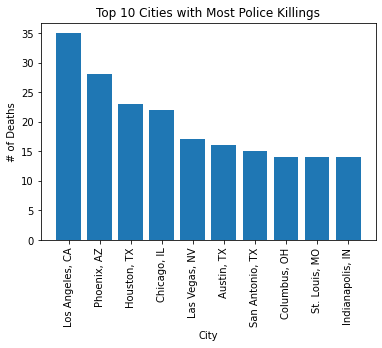

In [307]:
top10_city_killed = {}
cnt = 0

for city in city_killed:
  # Once top 10 cities in, break
  if cnt == 10:
    break;

  # Else, put in city and increment count
  elif cnt < 10:
    count = city_killed[city]
    top10_city_killed[city] = count
    cnt = cnt + 1

# Plot keys and values
keys = list(top10_city_killed.keys())
values = list(top10_city_killed.values())
plt.xticks(rotation='vertical')

# Plot title, axes labels and bar plot
plt.title('Top 10 Cities with Most Police Killings')
plt.xlabel('City')
plt.ylabel('# of Deaths')
plt.bar(range(len(values)), values, tick_label=keys)

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [308]:
keys = list(top10_city_killed.keys())
death_race = {'City': [], 'Race': [], 'Percent': []}
for ind in df_share_race_city.index:
  # Get city and state
  city = df_share_race_city['City'][ind]
  state = df_share_race_city['Geographic area'][ind]

  # For looping city
  temp = city.split(' ')
  last = len(temp) - 1
  new_city = ''

  # Update city
  for i in range(0, last):
    new_city += temp[i]
  city = new_city

  # Space out city properly
  final_city = ''
  for i in range(0, len(city)):
    final_city += city[i]

    # Add space if necessary
    if (i < len(city) - 2):
      if city[i + 1].isupper():
        final_city += ' '
  city = final_city

  # If valid racial cencus value
  if df_share_race_city['share_white'][ind] != '(X)':
    # Percentage of race makeup
    white = float(df_share_race_city['share_white'][ind])
    black = float(df_share_race_city['share_black'][ind])
    native_american = float(df_share_race_city['share_native_american'][ind])
    asian = float(df_share_race_city['share_asian'][ind])
    hispanic = float(df_share_race_city['share_hispanic'][ind])

    location = f'{city}, {state}'
    if location in keys:
      # Append the city for each possible race
      for i in range(0, 5):
        death_race['City'].append(location)

      # Append each race
      death_race['Race'].append('White')
      death_race['Race'].append('Black')
      death_race['Race'].append('Native Amerian')
      death_race['Race'].append('Asian')
      death_race['Race'].append('Hispanic')

      # Append each race makeup
      death_race['Percent'].append(white)
      death_race['Percent'].append(black)
      death_race['Percent'].append(native_american)
      death_race['Percent'].append(asian)
      death_race['Percent'].append(hispanic)

In [309]:
death_race_df = pd.DataFrame(death_race)
death_race_df.tail()

# Make bar plot out of dataset
avg_race_bar = px.bar(x=death_race_df['City'], y=death_race_df['Percent'], 
                      color=death_race_df['Race'], title='Racial Makeup of Cities with Top 10 Deaths')

# Update layout and show
avg_race_bar.update_layout(xaxis_title='State', 
                          yaxis_title='% of populaton')
avg_race_bar.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [310]:
# Group number of killings by staet
state_killings = df_share_race_city.groupby(['Geographic area'], as_index=False).agg({'City': pd.Series.count})
state_killings.head()

,Geographic area,City
0,AK,355
1,AL,578
2,AR,541
3,AZ,451
4,CA,1523


In [311]:
# Plot US states choropleth of number of killings (City) and the state (Geographic area)
fig = px.choropleth(state_killings,
                    locations='Geographic area',
                    color='City',
                    color_continuous_scale='spectral_r',
                    hover_name='Geographic area',
                    locationmode='USA-states',
                    labels={'City':'Number of Killings by Police', 'Geographic area': 'State'},
                    scope='usa')
fig.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [312]:
# Get the value counts of each time
time_fatalities = df_fatalities
time_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age range
0,3,Tim Elliot,02/01/15,shot,gun,53.00,Male,Asian,Shelton,WA,True,attack,Not fleeing,False,25 and Older
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,Male,White,Aloha,OR,False,attack,Not fleeing,False,25 and Older
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,Male,Hispanic,Wichita,KS,False,other,Not fleeing,False,Under 25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,Male,White,San Francisco,CA,True,attack,Not fleeing,False,25 and Older
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,Male,Hispanic,Evans,CO,False,attack,Not fleeing,False,25 and Older


In [313]:
years = []
for ind in time_fatalities.index:
  # Get the date and the year part of it
  date = time_fatalities['date'][ind]
  date_val = date.split('/')
  year_num = int(date_val[2])

  temp = ''
  # Parse to appropriate year
  if year_num <= 20:
    year = '20' + str(year_num)
  else:
    year = '19' + str(year_num)
  years.append(year)

# Make Year column
time_fatalities['Year'] = years
time_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age range,Year
0,3,Tim Elliot,02/01/15,shot,gun,53.00,Male,Asian,Shelton,WA,True,attack,Not fleeing,False,25 and Older,2015
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,Male,White,Aloha,OR,False,attack,Not fleeing,False,25 and Older,2015
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,Male,Hispanic,Wichita,KS,False,other,Not fleeing,False,Under 25,2015
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,Male,White,San Francisco,CA,True,attack,Not fleeing,False,25 and Older,2015
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,Male,Hispanic,Evans,CO,False,attack,Not fleeing,False,25 and Older,2015


In [314]:
time_count = time_fatalities.value_counts('Year')
print(time_death)

time_death = {}
for ind in time_count.index:
  # Parse year and the number of deaths for 
  year = ind
  deaths = time_count[ind]
  time_death[year] = deaths

{'2015': 947, '2016': 873, '2017': 434}


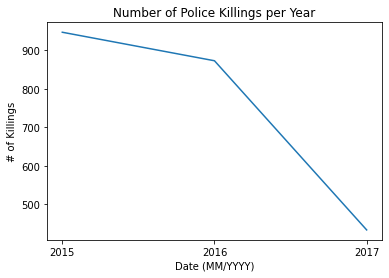

In [315]:
# List of keys and values, and x ticks rotated vertically
keys = list(time_death.keys())
values = list(time_death.values())

# Title plot, title axes, and show plot
plt.title('Number of Police Killings per Year')
plt.xlabel('Date (MM/YYYY)')
plt.ylabel('# of Killings')
plt.plot(keys, values)

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).